In [1]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import numpy as np
from scipy.stats import linregress
import requests
import time
import json

master_csv = "archive/Master.csv"
salaries_csv = "archive/Salaries.csv"
teams_csv = "archive/Teams.csv"

In [2]:
#read in csv files
master_df = pd.read_csv(master_csv)
#master_df.head()
salaries_df = pd.read_csv(salaries_csv)
#salaries_df.head()
teams_df = pd.read_csv(teams_csv)
#teams_df

#filter batting df 
#filtered_batting_df = batting_df.loc[batting_df['yearID'] > 1999]
#filtered_batting_df
# Combine the data into a single dataset
bball_data_merge = pd.merge(master_df, salaries_df, how="left", on="playerID")

# Display the data table for preview
bball_data_merge.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2004.0,SFN,NL,300000.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2007.0,CHA,AL,387500.0
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2008.0,BOS,AL,403250.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2009.0,SEA,AL,419000.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2010.0,SEA,AL,2750000.0


In [3]:
list(bball_data_merge.columns) 

['playerID',
 'birthYear',
 'birthMonth',
 'birthDay',
 'birthCountry',
 'birthState',
 'birthCity',
 'deathYear',
 'deathMonth',
 'deathDay',
 'deathCountry',
 'deathState',
 'deathCity',
 'nameFirst',
 'nameLast',
 'nameGiven',
 'weight',
 'height',
 'bats',
 'throws',
 'debut',
 'finalGame',
 'retroID',
 'bbrefID',
 'yearID',
 'teamID',
 'lgID',
 'salary']

In [4]:
#drop unneed columns
cleaned_df = bball_data_merge.drop(['birthMonth',
                                     'birthDay',
                                    'deathMonth',
                                     'deathDay',
                                     'deathCountry',
                                     'deathState',
                                     'deathCity'
                                     
                                    ], axis = 1)

cleaned_df

,playerID,birthYear,birthCountry,birthState,birthCity,deathYear,nameFirst,nameLast,nameGiven,weight,...,bats,throws,debut,finalGame,retroID,bbrefID,yearID,teamID,lgID,salary
0,aardsda01,1981.0,USA,CO,Denver,NaN,David,Aardsma,David Allan,220.0,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2004.0,SFN,NL,300000.0
1,aardsda01,1981.0,USA,CO,Denver,NaN,David,Aardsma,David Allan,220.0,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2007.0,CHA,AL,387500.0
2,aardsda01,1981.0,USA,CO,Denver,NaN,David,Aardsma,David Allan,220.0,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2008.0,BOS,AL,403250.0
3,aardsda01,1981.0,USA,CO,Denver,NaN,David,Aardsma,David Allan,220.0,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2009.0,SEA,AL,419000.0
4,aardsda01,1981.0,USA,CO,Denver,NaN,David,Aardsma,David Allan,220.0,...,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,2010.0,SEA,AL,2750000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39450,zupofr01,1939.0,USA,CA,San Francisco,2005.0,Frank,Zupo,Frank Joseph,182.0,...,L,R,1957-07-01,1961-05-09,zupof101,zupofr01,NaN,NaN,NaN,NaN
39451,zuvelpa01,1958.0,USA,CA,San Mateo,NaN,Paul,Zuvella,Paul,173.0,...,R,R,1982-09-04,1991-05-02,zuvep001,zuvelpa01,1989.0,ATL,NL,145000.0
39452,zuverge01,1924.0,USA,MI,Holland,2014.0,George,Zuverink,George,195.0,...,R,R,1951-04-21,1959-06-15,zuveg101,zuverge01,NaN,NaN,NaN,NaN
39453,zwilldu01,1888.0,USA,MO,St. Louis,1978.0,Dutch,Zwilling,Edward Harrison,160.0,...,L,L,1910-08-14,1916-07-12,zwild101,zwilldu01,NaN,NaN,NaN,NaN


In [5]:
list(cleaned_df.columns) 

['playerID',
 'birthYear',
 'birthCountry',
 'birthState',
 'birthCity',
 'deathYear',
 'nameFirst',
 'nameLast',
 'nameGiven',
 'weight',
 'height',
 'bats',
 'throws',
 'debut',
 'finalGame',
 'retroID',
 'bbrefID',
 'yearID',
 'teamID',
 'lgID',
 'salary']

In [6]:
#cleaned_df['salary'].astype(float).dropna()

#df.dropna(subset = ["column2"], inplace=True)

cleaned_df = cleaned_df.rename(columns={'playerID': 'Player ID',
                                         'birthYear': 'Birth Year',
                                         'birthCountry': 'Birth Country',
                                         'birthState': 'Birth State',
                                         'birthCity': 'Birth City',
                                         'deathYear': "Death Year",
                                         'nameFirst': 'First Name',
                                         'nameLast': 'Last Name',
                                         'nameGiven': 'Full Name',
                                         'weight': 'Weight',
                                         'height': 'Height',
                                         'bats': 'Bats',
                                         'throws': 'Throws',
                                         'debut': 'Debut Date',
                                         'finalGame': 'Date of Last Game',
                                         'retroID': 'Retro ID',
                                         'bbrefID': 'BBRef ID',
                                         'yearID': 'Year ID',
                                         'teamID': 'Team ID',
                                         'lgID': 'League',
                                         'salary':'Salary'
                                     })
cleaned_df = pd.DataFrame(cleaned_df)
list(cleaned_df.columns) 

['Player ID',
 'Birth Year',
 'Birth Country',
 'Birth State',
 'Birth City',
 'Death Year',
 'First Name',
 'Last Name',
 'Full Name',
 'Weight',
 'Height',
 'Bats',
 'Throws',
 'Debut Date',
 'Date of Last Game',
 'Retro ID',
 'BBRef ID',
 'Year ID',
 'Team ID',
 'League',
 'Salary']

In [7]:
salary_df = cleaned_df.drop([ 'Death Year',
                                     'First Name',
                                     'Last Name',
                                     'Full Name',
                                     'Weight',
                                     'Height',
                                     'Bats',
                                     'Throws',
                                     'Debut Date',
                                     'Date of Last Game',
                                     'Retro ID',
                                     'BBRef ID'
                                      ], axis = 1)

#salary_df = salary_df.dropna()
salary_df = salary_df.loc[salary_df['Salary'].isnull() == False]
salary_df = salary_df.loc[salary_df['Year ID'] > 1999]
salary_df = pd.DataFrame(salary_df)
salary_df

,Player ID,Birth Year,Birth Country,Birth State,Birth City,Year ID,Team ID,League,Salary
0,aardsda01,1981.0,USA,CO,Denver,2004.0,SFN,NL,300000.0
1,aardsda01,1981.0,USA,CO,Denver,2007.0,CHA,AL,387500.0
2,aardsda01,1981.0,USA,CO,Denver,2008.0,BOS,AL,403250.0
3,aardsda01,1981.0,USA,CO,Denver,2009.0,SEA,AL,419000.0
4,aardsda01,1981.0,USA,CO,Denver,2010.0,SEA,AL,2750000.0
...,...,...,...,...,...,...,...,...,...
39442,zumayjo01,1984.0,USA,CA,Chula Vista,2009.0,DET,AL,735000.0
39443,zumayjo01,1984.0,USA,CA,Chula Vista,2010.0,DET,AL,915000.0
39444,zumayjo01,1984.0,USA,CA,Chula Vista,2011.0,DET,AL,1400000.0
39445,zuninmi01,1991.0,USA,FL,Cape Coral,2014.0,SEA,AL,504100.0


In [ ]:
usa_salary_df = salary_df.loc[salary_df['Birth Country'] == 'USA']

In [ ]:
#line plot
plt.plot(salary_df['Year ID'], salary_df['Salary'], color = "purple" )
plt.title("Salary vs Year")
plt.xlabel("Year", color = "orange")
plt.ylabel("Salary", color = "green")
plt.show()

In [ ]:
#line plot
plt.bar(salary_df['Birth Country'], salary_df['Salary'] / len(salary_df['Player ID']), color = "purple" )
plt.title("Avg. Salary vs. State")
plt.xlabel("State", color = "orange")
plt.xticks(rotation = 90)
plt.ylabel("Salary", color = "green")
plt.show()

In [ ]:
#group by birth city
birth_city = salary_df.groupby(['Birth City'])
cities = []
cities.append(salary_df['Birth City'])


#create each variable
player_count = birth_city['Player ID'].nunique()
mean_salary = birth_city.mean()['Salary']
median_salary = birth_city.median()['Salary']
var_salary = birth_city.var()['Salary']
std_dev_salary = birth_city.std()['Salary']
sems_salary = birth_city.sem()['Salary']

#player birth city summary table
summary_city_df = pd.DataFrame({"Number of Players": player_count,
                              "Mean Player Salary": mean_salary,
                              "Median Player Salary": median_salary,
                              "Player Salary Variance": var_salary,
                              "Player Salary Std. Dev.": std_dev_salary,
                              "Player Salary Std. Error": sems_salary})

#format columns
summary_city_df = summary_city_df.sort_values(by=['Number of Players'], ascending=False)
summary_city_df['Mean Player Salary'] = summary_city_df['Mean Player Salary'].map("${:,.0f}".format)
summary_city_df['Median Player Salary'] = summary_city_df['Median Player Salary'].map("${:,.0f}".format)
summary_city_df['Player Salary Variance'] = summary_city_df['Player Salary Variance'].map("${:,.0f}".format)
summary_city_df['Player Salary Std. Dev.'] = summary_city_df['Player Salary Std. Dev.'].map("${:,.0f}".format)
summary_city_df['Player Salary Std. Error'] = summary_city_df['Player Salary Std. Error'].map("${:,.0f}".format)

output_summary_city = summary_city_df.reset_index()
summary_city_df

In [ ]:
# Save summary_city_df as a csv
# Note to avoid any issues later, use encoding="utf-8"
output_summary_city.to_csv("salary_summary_city_WJR.csv", encoding="utf-8", index=False)

In [ ]:
#group by birth state
birth_state = salary_df.groupby(['Birth State'])

#create each variable
player_count = birth_state['Player ID'].nunique()
mean_salary = birth_state.mean()['Salary']
median_salary = birth_state.median()['Salary']
var_salary = birth_state.var()['Salary']
std_dev_salary = birth_state.std()['Salary']
sems_salary = birth_state.sem()['Salary']

#player birth city summary table
summary_state_df = pd.DataFrame({"Number of Players": player_count,
                              "Mean Player Salary": mean_salary,
                              "Median Player Salary": median_salary,
                              "Player Salary Variance": var_salary,
                              "Player Salary Std. Dev.": std_dev_salary,
                              "Player Salary Std. Error": sems_salary})

#format columns
summary_state_df = summary_state_df.sort_values(by=['Number of Players'], ascending=False)
summary_state_df['Mean Player Salary'] = summary_state_df['Mean Player Salary'].map("${:,.0f}".format)
summary_state_df['Median Player Salary'] = summary_state_df['Median Player Salary'].map("${:,.0f}".format)
summary_state_df['Player Salary Variance'] = summary_state_df['Player Salary Variance'].map("${:,.0f}".format)
summary_state_df['Player Salary Std. Dev.'] = summary_state_df['Player Salary Std. Dev.'].map("${:,.0f}".format)
summary_state_df['Player Salary Std. Error'] = summary_state_df['Player Salary Std. Error'].map("${:,.0f}".format)

summary_state_df

In [8]:
#group by birth country
birth_country = salary_df.groupby(['Birth Country'])

#create each variable
player_count = birth_country['Player ID'].nunique()
mean_salary = birth_country.mean()['Salary']
median_salary = birth_country.median()['Salary']
max_salary = birth_country['Salary'].max()
min_salary = birth_country['Salary'].min()
var_salary = birth_country.var()['Salary']
std_dev_salary = birth_country.std()['Salary']
sems_salary = birth_country.sem()['Salary']

#player birth city summary table
summary_country_df = pd.DataFrame({"Number of Players": player_count,
                              "Mean Player Salary": mean_salary,
                              "Median Player Salary": median_salary,
                               "Max Player Salary": max_salary,
                                "Min Player Salary": min_salary,
                              "Player Salary Variance": var_salary,
                              "Player Salary Std. Dev.": std_dev_salary,
                              "Player Salary Std. Error": sems_salary})

#format columns
summary_country_df = summary_country_df.sort_values(by=['Number of Players'], ascending=False)
summary_country_df['Mean Player Salary'] = summary_country_df['Mean Player Salary'].map("${:,.0f}".format)
summary_country_df['Median Player Salary'] = summary_country_df['Median Player Salary'].map("${:,.0f}".format)
summary_country_df['Max Player Salary'] = summary_country_df['Max Player Salary'].map("${:,.0f}".format)
summary_country_df['Min Player Salary'] = summary_country_df['Min Player Salary'].map("${:,.0f}".format)
summary_country_df['Player Salary Variance'] = summary_country_df['Player Salary Variance'].map("${:,.0f}".format)
summary_country_df['Player Salary Std. Dev.'] = summary_country_df['Player Salary Std. Dev.'].map("${:,.0f}".format)
summary_country_df['Player Salary Std. Error'] = summary_country_df['Player Salary Std. Error'].map("${:,.0f}".format)

summary_country_df

,Number of Players,Mean Player Salary,Median Player Salary,Max Player Salary,Min Player Salary,Player Salary Variance,Player Salary Std. Dev.,Player Salary Std. Error
Birth Country,,,,,,,,
USA,2326,"$2,947,412","$1,000,000","$33,000,000","$200,000","$16,752,378,715,366","$4,092,967","$41,702"
D.R.,314,"$3,279,718","$1,025,000","$24,000,000","$200,000","$20,175,008,229,502","$4,491,660","$123,676"
Venezuela,172,"$2,989,871","$850,000","$24,857,000","$165,574","$19,403,512,906,123","$4,404,942","$156,622"
P.R.,81,"$3,611,600","$1,412,500","$19,700,000","$200,000","$19,742,473,543,067","$4,443,250","$216,294"
CAN,48,"$3,391,683","$1,375,000","$18,910,655","$200,000","$18,591,768,220,585","$4,311,817","$300,419"
Japan,46,"$4,900,168","$3,250,000","$22,000,000","$212,000","$22,504,246,432,235","$4,743,864","$355,568"
Mexico,42,"$2,006,542","$900,000","$14,000,000","$200,000","$6,784,818,402,732","$2,604,768","$183,271"
Cuba,41,"$3,336,567","$2,583,334","$10,500,000","$200,000","$8,306,772,452,874","$2,882,147","$225,058"
Panama,19,"$4,195,637","$1,043,750","$19,000,000","$200,000","$29,082,384,305,181","$5,392,809","$562,239"


In [9]:
usa_salary_df = salary_df.loc[salary_df['Birth Country'] == 'USA']
usa_salary_df

,Player ID,Birth Year,Birth Country,Birth State,Birth City,Year ID,Team ID,League,Salary
0,aardsda01,1981.0,USA,CO,Denver,2004.0,SFN,NL,300000.0
1,aardsda01,1981.0,USA,CO,Denver,2007.0,CHA,AL,387500.0
2,aardsda01,1981.0,USA,CO,Denver,2008.0,BOS,AL,403250.0
3,aardsda01,1981.0,USA,CO,Denver,2009.0,SEA,AL,419000.0
4,aardsda01,1981.0,USA,CO,Denver,2010.0,SEA,AL,2750000.0
...,...,...,...,...,...,...,...,...,...
39442,zumayjo01,1984.0,USA,CA,Chula Vista,2009.0,DET,AL,735000.0
39443,zumayjo01,1984.0,USA,CA,Chula Vista,2010.0,DET,AL,915000.0
39444,zumayjo01,1984.0,USA,CA,Chula Vista,2011.0,DET,AL,1400000.0
39445,zuninmi01,1991.0,USA,FL,Cape Coral,2014.0,SEA,AL,504100.0


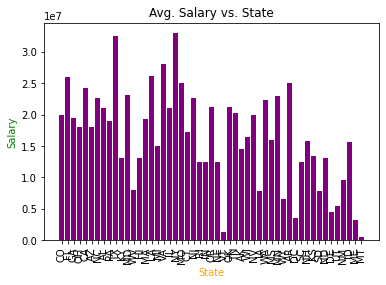

In [12]:
#line plot
plt.bar(usa_salary_df['Birth State'], usa_salary_df['Salary'], color = "purple")
plt.title("Avg. Salary vs. State")
plt.xlabel("State", color = "orange")
plt.xticks(rotation = 90)
plt.ylabel("Salary", color = "green")
plt.show()

In [10]:
#group by birth state
birth_state = usa_salary_df.groupby(['Birth State'])

#print(birth_state)
#create each variable
player_count = birth_state['Player ID'].nunique()
mean_salary = birth_state.mean()['Salary']
median_salary = birth_state.median()['Salary']
var_salary = birth_state.var()['Salary']
std_dev_salary = birth_state.std()['Salary']
sems_salary = birth_state.sem()['Salary']

#player birth city summary table
summary_state_df = pd.DataFrame({"Number of Players": player_count,
                              "Mean Player Salary": mean_salary,
                              "Median Player Salary": median_salary,
                              "Player Salary Variance": var_salary,
                              "Player Salary Std. Dev.": std_dev_salary,
                              "Player Salary Std. Error": sems_salary})

#format columns
summary_state_df = summary_state_df.sort_values(by=['Mean Player Salary'], ascending=False)
summary_state_df['Mean Player Salary'] = summary_state_df['Mean Player Salary'].map("${:,.0f}".format)
summary_state_df['Median Player Salary'] = summary_state_df['Median Player Salary'].map("${:,.0f}".format)
summary_state_df['Player Salary Variance'] = summary_state_df['Player Salary Variance'].map("${:,.0f}".format)
summary_state_df['Player Salary Std. Dev.'] = summary_state_df['Player Salary Std. Dev.'].map("${:,.0f}".format)
summary_state_df['Player Salary Std. Error'] = summary_state_df['Player Salary Std. Error'].map("${:,.0f}".format)

summary_state_df.reset_index()

,Birth State,Number of Players,Mean Player Salary,Median Player Salary,Player Salary Variance,Player Salary Std. Dev.,Player Salary Std. Error
0,AR,12,"$6,479,446","$3,025,000","$47,309,863,726,468","$6,878,217","$759,572"
1,ID,7,"$4,335,798","$2,750,000","$25,177,673,858,484","$5,017,736","$1,003,547"
2,ND,4,"$4,316,863","$2,850,000","$17,287,899,314,816","$4,157,872","$759,120"
3,RI,5,"$4,223,395","$2,525,000","$19,044,570,210,642","$4,364,009","$673,381"
4,AK,7,"$3,934,097","$1,400,000","$22,428,843,173,916","$4,735,910","$879,436"
5,NH,6,"$3,925,604","$1,275,000","$20,827,660,588,815","$4,563,733","$862,465"
6,MD,25,"$3,734,956","$1,100,000","$33,022,794,568,674","$5,746,546","$563,495"
7,VA,47,"$3,659,014","$1,225,000","$23,490,060,181,404","$4,846,655","$339,334"
8,MN,18,"$3,568,370","$950,000","$35,167,938,955,523","$5,930,256","$658,917"
9,NC,41,"$3,521,368","$1,750,000","$17,134,610,063,401","$4,139,397","$294,174"


In [11]:
#line plot
plt.bar(summary_state_df['Birth State'], summary_state_df['Mean Player Salary'], color = "purple")
plt.title("Avg. Salary vs. State")
plt.xlabel("State", color = "orange")
plt.xticks(rotation = 90)
plt.ylabel("Salary", color = "green")
plt.show()

KeyError: 'Birth State'

In [ ]:
#MLB city salary summary
#city salary summary data file
city_salary_path = "../group_1_project/salary_summary_city_WJR.csv"

#read the city salary data file
city_salary_df = pd.read_csv(city_salary_path, dtype="object", encoding="utf-8")
city_salary_df.head() 